Loaded 100 (2271 beats)
Loaded 101 (1872 beats)
Loaded 102 (2191 beats)
Loaded 103 (2090 beats)
Loaded 104 (2309 beats)
Loaded 105 (2690 beats)
Loaded 106 (2097 beats)
Loaded 107 (2138 beats)
Loaded 108 (1822 beats)
Loaded 109 (2533 beats)
Loaded 111 (2132 beats)
Loaded 112 (2549 beats)
Loaded 113 (1794 beats)
Loaded 114 (1889 beats)
Loaded 115 (1960 beats)
Loaded 116 (2420 beats)
Loaded 117 (1537 beats)
Loaded 118 (2299 beats)
Loaded 119 (2093 beats)
Loaded 121 (1875 beats)
Loaded 122 (2476 beats)
Loaded 123 (1517 beats)
Loaded 124 (1633 beats)
Loaded 200 (2790 beats)
Loaded 201 (2038 beats)
Loaded 202 (2146 beats)
Loaded 203 (3105 beats)
Loaded 205 (2671 beats)
Loaded 207 (2383 beats)
Loaded 208 (3037 beats)
Loaded 209 (3051 beats)
Loaded 210 (2682 beats)
Loaded 212 (2762 beats)
Loaded 213 (3291 beats)
Loaded 214 (2295 beats)
Loaded 215 (3399 beats)
Loaded 217 (2279 beats)
Loaded 219 (2312 beats)
Loaded 220 (2066 beats)
Loaded 221 (2461 beats)
Loaded 222 (2632 beats)
Loaded 223 (2642

/Users/matthewcapstick/Documents/Malignant Ventricular Ectopy/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10


/Users/matthewcapstick/Documents/Malignant Ventricular Ectopy/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1911/1911 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9436 - loss: 0.1631 - val_accuracy: 0.8404 - val_loss: 0.4071
Epoch 2/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9810 - loss: 0.0609 - val_accuracy: 0.8160 - val_loss: 0.4737
Epoch 3/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.8403 - val_loss: 0.4077
Epoch 4/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.8616 - val_loss: 0.4429
Epoch 5/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.6933 - val_loss: 1.3444
Epoch 6/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.7715 - val_loss: 0.8398
Epoch 7/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.7337 - val_loss: 0.9248
Epoch 8/10
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9911 - loss: 0.02

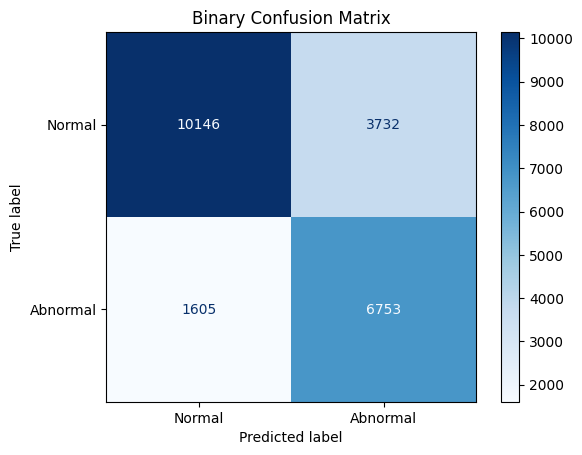


Classification report:
              precision    recall  f1-score   support

      Normal       0.86      0.73      0.79     13878
    Abnormal       0.64      0.81      0.72      8358

    accuracy                           0.76     22236
   macro avg       0.75      0.77      0.75     22236
weighted avg       0.78      0.76      0.76     22236

695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


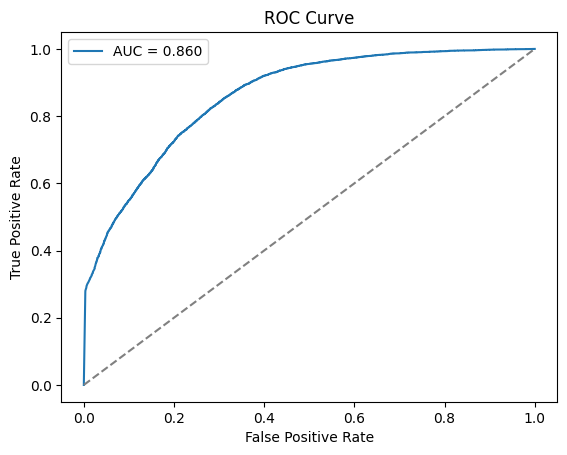

In [ ]:
import wfdb
import numpy as np
import random
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
from scipy.signal import resample

data_path = "/Users/matthewcapstick/Documents/Malignant Ventricular Ectopy/mit-bih-arrhythmia-database-1.0.0/"
record_ids = [
    "100", "101", "102", "103", "104", "105", "106", "107",
    "108", "109", "111", "112", "113", "114", "115", "116",
    "117", "118", "119", "121", "122", "123", "124", "200",
    "201", "202", "203", "205", "207", "208", "209", "210",
    "212", "213", "214", "215", "217", "219", "220", "221",
    "222", "223", "228", "230", "231", "232", "233", "234"]

window_sec = 0.6

# LOAD AND SEGMENT EACH RECORD

def extract_beats(record_name, data_path, window_sec=0.6):
    record = wfdb.rdrecord(data_path + record_name)
    ann = wfdb.rdann(data_path + record_name, 'atr')
    signal = record.p_signal[:, 0]
    fs = record.fs
    window_size = int(window_sec * fs)

    beats, labels = [], []
    for i, idx in enumerate(ann.sample):
        start = max(0, idx - window_size // 2)
        end = min(len(signal), idx + window_size // 2)
        segment = signal[start:end]
        if len(segment) == window_size:
            beats.append(segment)
            labels.append(ann.symbol[i])
    return np.array(beats), np.array(labels)

# COMBINE ALL PATIENTS
all_beats, all_labels, patient_ids = [], [], []
for rec in record_ids:
    try:
        Xp, yp = extract_beats(rec, data_path, window_sec)
        all_beats.append(Xp)
        all_labels.append(yp)
        patient_ids.extend([rec] * len(yp))
        print(f"Loaded {rec} ({len(yp)} beats)")
    except Exception as e:
        print(f"Error loading {rec}: {e}")

X = np.concatenate(all_beats)
y_symbols = np.concatenate(all_labels)
patient_ids = np.array(patient_ids)

print(f"\nTotal beats: {len(y_symbols)}")
print("Example symbols:", np.unique(y_symbols))

# CONVERT TO BINARY LABELS (0 = normal, 1 = abnormal)
y_bin = np.array([0 if s == 'N' else 1 for s in y_symbols])

# NORMALIZE INPUTS
X = (X - np.mean(X)) / np.std(X)
X = X[..., np.newaxis]

# CLASS-AWARE PATIENT SPLIT
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

unique_patients = np.unique(patient_ids)
classes = [0, 1]

# patient-class presence matrix
presence = np.zeros((len(unique_patients), len(classes)), dtype=int)
for i, pid in enumerate(unique_patients):
    patient_classes = set(y_bin[patient_ids == pid])
    for c in patient_classes:
        presence[i, c] = 1

mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)
train_idx, test_idx = next(mskf.split(np.zeros(len(unique_patients)), presence))

train_patients = [unique_patients[i] for i in train_idx]
test_patients = [unique_patients[i] for i in test_idx]

train_mask = np.isin(patient_ids, train_patients)
test_mask = np.isin(patient_ids, test_patients)

X_train, y_train = X[train_mask], y_bin[train_mask]
X_test, y_test = X[test_mask], y_bin[test_mask]

print("\nTrain class counts:", Counter(y_train))
print("Test class counts:", Counter(y_test))

# DATA AUGMENTATION FUNCTION
def augment_signal(sig):
    sig = sig + np.random.normal(0, 0.01, sig.shape) 
    sig = sig * np.random.uniform(0.9, 1.1)
    return sig

# 8. BALANCE TRAINING DATA WITH AUGMENTATION
def balance_with_augmentation(X, y):
    counts = Counter(y)
    max_count = max(counts.values())
    X_bal, y_bal = [], []
    for cls in counts.keys():
        cls_idx = np.where(y == cls)[0]
        n_needed = max_count - counts[cls]
        X_bal.extend(X[cls_idx])
        y_bal.extend([cls] * counts[cls])
        for _ in range(n_needed):
            sig = X[np.random.choice(cls_idx)].copy()
            sig_aug = augment_signal(sig)
            X_bal.append(sig_aug)
            y_bal.append(cls)
    return np.array(X_bal), np.array(y_bal)

X_train_bal, y_train_bal = balance_with_augmentation(X_train, y_train)
print("\nBalanced train class counts:", Counter(y_train_bal))

# CNN FOR BINARY CLASSIFICATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_bal.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_bal, y_train_bal,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test accuracy: {test_acc:.4f}")

# CONFUSION MATRIX & MISCLASSIFICATIONS
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int).flatten() # option to change threshold

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Abnormal"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Binary Confusion Matrix")
plt.show()

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Abnormal"]))

from sklearn.metrics import roc_curve, auc
y_score = model.predict(X_test).flatten()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()